In [11]:
import pandas as pd
import matplotlib.pyplot as plt

DATA_FILE = "../data/202506-citibike-tripdata/202506-citibike-tripdata_1.csv" 

Matplotlib is building the font cache; this may take a moment.


In [20]:
df = pd.read_csv(DATA_FILE, nrows=100000)  # load 100k rows for speed
#print("Shape:", df.shape)
df.head()
# member_types = df['member_casual'].unique()
# print(sorted(member_types))

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6532F46EF12DCA8C,electric_bike,2025-06-12 15:08:06.700,2025-06-12 15:11:20.652,Mercer St & Bleecker St,5679.05,E 1 St & Bowery,5636.13,40.727064,-73.996621,40.724861,-73.992131,member
1,DE5D64BE54489439,electric_bike,2025-06-12 13:05:20.309,2025-06-12 13:22:18.812,45 Rd & 11 St,6319.01,43 Ave & 42 St,6251.06,40.747086,-73.949772,40.745347,-73.921942,member
2,A19F721536473DA2,classic_bike,2025-06-13 18:03:51.268,2025-06-13 18:11:24.704,95 St & 35 Ave,6465.04,84 St & Roosevelt Ave,6323.04,40.753010,-73.872660,40.747970,-73.882040,member
3,5695831104F572BB,classic_bike,2025-06-11 17:01:40.807,2025-06-11 17:24:19.780,4 Ave & 17 St,3739.06,Willoughby St & Ashland Pl,4587.02,40.665507,-73.993037,40.691780,-73.978770,member
4,08F1301EED21DFC7,electric_bike,2025-06-06 18:43:26.907,2025-06-06 18:48:48.209,Mercer St & Bleecker St,5679.05,St Marks Pl & 2 Ave,5669.10,40.727064,-73.996621,40.728419,-73.987140,member


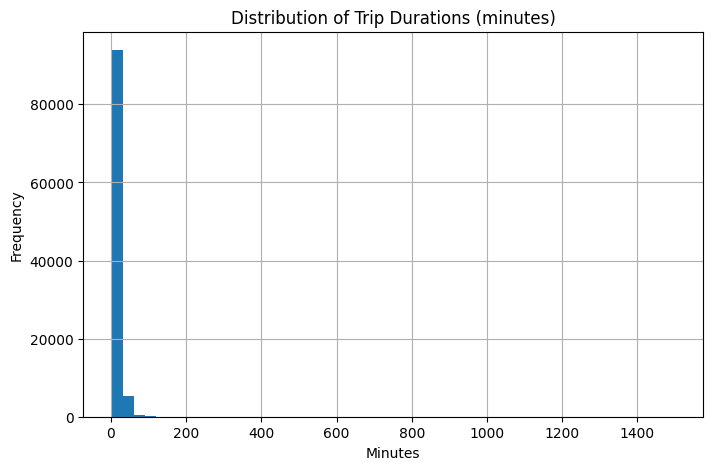

In [12]:
df["trip_duration_min"] = (pd.to_datetime(df["ended_at"]) - pd.to_datetime(df["started_at"])).dt.total_seconds() / 60
df["trip_duration_min"].hist(bins=50, figsize=(8,5))
plt.title("Distribution of Trip Durations (minutes)")
plt.xlabel("Minutes")
plt.ylabel("Frequency")
plt.show()

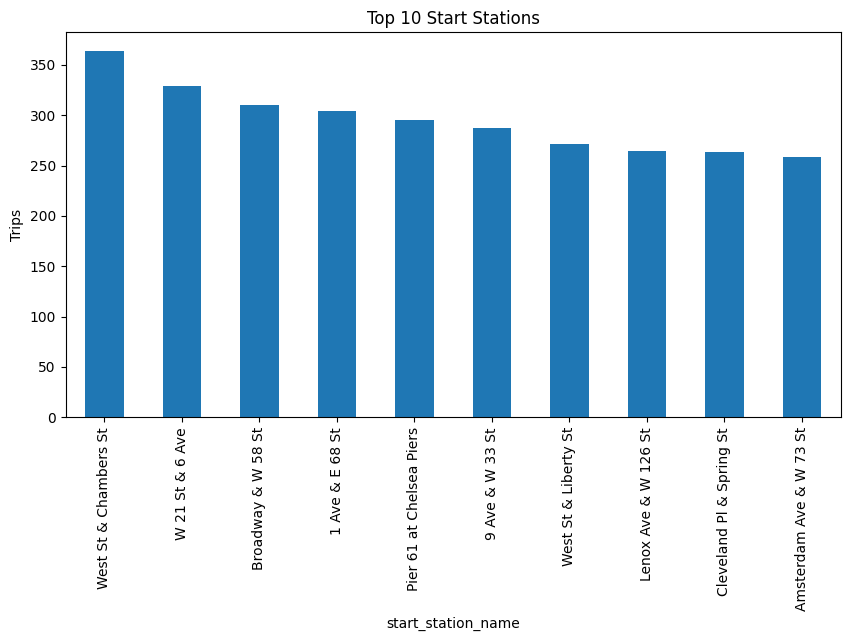

In [15]:
# 10 most popular start stations
top_stations = df["start_station_name"].value_counts().head(10)
top_stations.plot(kind="bar", figsize=(10,5))
plt.title("Top 10 Start Stations")
plt.ylabel("Trips")
plt.show()

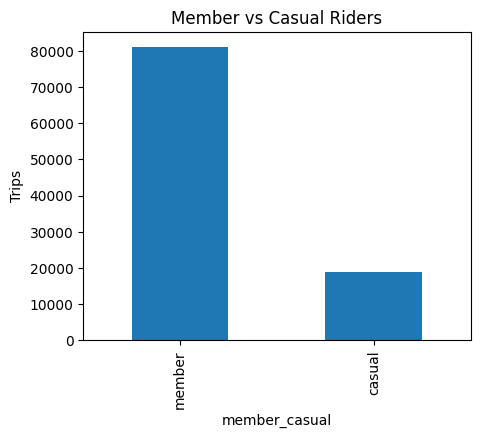

In [ ]:
df["member_casual"].value_counts().plot(kind="bar", figsize=(5,4))
plt.title("Member vs Casual Riders")
plt.ylabel("Trips")
plt.show()

In [19]:
# (each row → event dict with bike_id, start, end, timestamp)
events = df.head(5).apply(
    lambda row: {
        "bike_id": row["ride_id"],
        "start": row["start_station_id"],
        "end": row["end_station_id"],
        "timestamp": row["started_at"],
    },
    axis=1,
)

events = list(events)
events


[{'bike_id': '6532F46EF12DCA8C',
  'start': '5679.05',
  'end': '5636.13',
  'timestamp': '2025-06-12 15:08:06.700'},
 {'bike_id': 'DE5D64BE54489439',
  'start': '6319.01',
  'end': '6251.06',
  'timestamp': '2025-06-12 13:05:20.309'},
 {'bike_id': 'A19F721536473DA2',
  'start': '6465.04',
  'end': '6323.04',
  'timestamp': '2025-06-13 18:03:51.268'},
 {'bike_id': '5695831104F572BB',
  'start': '3739.06',
  'end': '4587.02',
  'timestamp': '2025-06-11 17:01:40.807'},
 {'bike_id': '08F1301EED21DFC7',
  'start': '5679.05',
  'end': '5669.10',
  'timestamp': '2025-06-06 18:43:26.907'}]